# Figure S12ABC

## Plot pancreas data

### Import packages

In [1]:
%load_ext nb_black

import scdiffeq as sdq
import scdiffeq_analyses as sdq_an
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cellplots as cp
import scanpy as sc

<IPython.core.display.Javascript object>

### Load data

In [2]:
adata = sdq.datasets.pancreas()

/home/mvinyard/.anaconda3/envs/sdq-dev/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<IPython.core.display.Javascript object>

### Prepare time

`cellrank` has a handy implementation of `CytoTRACE`, which we'll use to assign pseudotime.

In [3]:
adata = sdq_an.tl.compute_CytoTRACE_pseudotime(adata)

Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:07) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


<IPython.core.display.Javascript object>

Next, we'll bin the computed CytoTRACE pseudotime. We'll use 10 non-t0 bins (i.e, 11 total)

In [4]:
sdq_an.tl.bin_pseudotime(adata, pseudotime_key="ct_pseudotime", n_bins=10)

<IPython.core.display.Javascript object>

### Plot data umaps

In [5]:
adata_pl = adata.copy()
adata_pl.obs["t"] = pd.Categorical(adata_pl.obs["t"])
clusters = adata.obs["clusters"].unique().sort_values()
clust_cmap = {i: j for i, j in zip(clusters, adata.uns["clusters_colors"])}

<IPython.core.display.Javascript object>

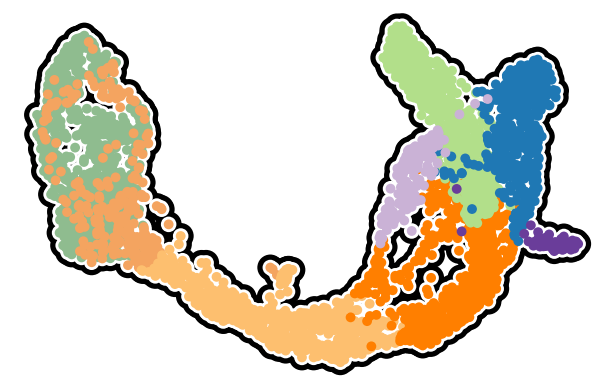

<IPython.core.display.Javascript object>

In [6]:
fig, axes = cp.plot(1, 1, height=1, width=1.2, del_xy_ticks=[True], delete="all")
_ = cp.umap_manifold(
    adata_pl,
    ax=axes[0],
    s_background=350,
    s_cover=125,
)
zorder = {
    list(clust_cmap.keys())[i]: 100 + i for i in range(len(list(clust_cmap.keys())))
}

_ = cp.umap(
    adata_pl,
    ax=axes[0],
    groupby="clusters",
    cmap=clust_cmap,
    s=50,
    force_zorder=zorder,
)
xu = adata_pl.obsm["X_umap"]
# img = axes[0].scatter(xu[:, 0], xu[:, 1], cmap=, zorder=101, ec="None", s=50)
# plt.colorbar(img)
plt.savefig("pancreas.cytotrace_manifold.svg")

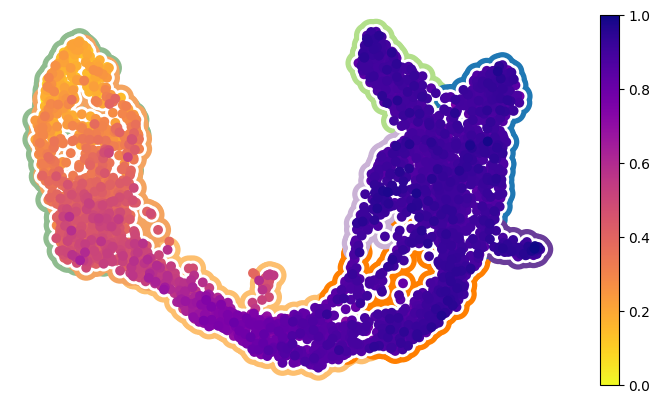

<IPython.core.display.Javascript object>

In [7]:
fig, axes = cp.plot(1, 1, height=1, width=1.4, del_xy_ticks=[True], delete="all")
_ = cp.umap_manifold(
    adata_pl,
    ax=axes[0],
    groupby="clusters",
    c_background=clust_cmap,
    s_background=350,
    s_cover=125,
)
xu = adata_pl.obsm["X_umap"]
c = adata.obs["ct_pseudotime"]
c_idx = np.argsort(c)
x, y = xu[c_idx, 0], xu[c_idx, 1]
img = axes[0].scatter(x, y, c=c[c_idx], cmap="plasma_r", zorder=101, ec="None", s=50)
plt.colorbar(img)
plt.savefig("pancreas.cytotrace_time.figure_ready.svg")

In [8]:
t_colors = [
    "#582f0e",
    "#7f4f24",
    "#936639",
    "#a68a64",
    "#b6ad90",
    "#c2c5aa",
    "#B3B998",
    "#a4ac86",
    "#656d4a",
    "#414833",
    "#333d29",
]
cmap = {i: j for i, j in zip(sorted(adata.obs["t"].unique()), t_colors)}
zorder = {i: 100 + i for i in range(len(t_colors))}

<IPython.core.display.Javascript object>

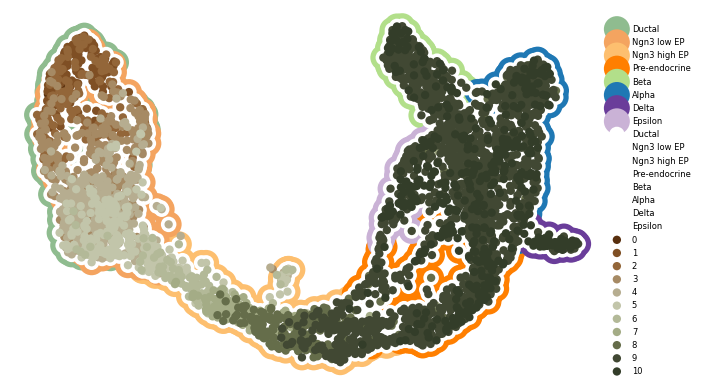

<IPython.core.display.Javascript object>

In [9]:
fig, axes = cp.plot(1, 1, height=1, width=1.2, del_xy_ticks=[True], delete="all")
_ = cp.umap_manifold(
    adata_pl,
    ax=axes[0],
    groupby="clusters",
    c_background=clust_cmap,
    s_background=350,
    s_cover=125,
)
cp.umap(adata_pl, groupby="t", cmap=cmap, ax=axes[0], force_zorder=zorder)
plt.legend(facecolor="None", edgecolor="None", loc=(1, 0), markerscale=1, fontsize=6)
plt.savefig("pancreas.binned_cytotrace_time.figure_ready.svg")